In [1]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    # 위도 경도 → 라디안 변환
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371  # 지구 반지름 (km)
    return c * r

In [3]:
import pandas as pd

df_office = pd.read_csv('오피스텔_리스트.csv', encoding='utf-8')
df_apart = pd.read_csv('아파트_리스트.csv', encoding='utf-8')
df_starbucks = pd.read_csv('스타벅스_리스트_위도경도.csv', encoding='utf-8')

def find_nearest_starbucks(lat, lon, df_starbucks):
    distances = df_starbucks.apply(
        lambda row: haversine(lat, lon, row['위도'], row['경도']),
        axis=1
    )
    return distances.min()

# 각 아파트에 가장 가까운 스타벅스 거리 계산
df_apart['스타벅스_거리_km'] = df_apart.apply(
    lambda row: find_nearest_starbucks(row['위도'], row['경도'], df_starbucks),
    axis=1
)

# 오피스텔도 동일하게
df_office['스타벅스_거리_km'] = df_office.apply(
    lambda row: find_nearest_starbucks(row['위도'], row['경도'], df_starbucks),
    axis=1
)

In [7]:
df_office = df_office[['단지명', '스타벅스_거리_km']]

In [6]:
df_apart = df_apart[['단지명', '스타벅스_거리_km']]

In [8]:
apart = pd.read_csv('아파트.csv', encoding='utf-8')
office = pd.read_csv('오피스텔.csv', encoding='utf-8')

apart_df = apart.merge(df_apart, on="단지명", how="left")
office_df = office.merge(df_apart, on="단지명", how="left")

In [10]:
# 아파트
correlation = apart_df[['스타벅스_거리_km', '평당가격']].corr().iloc[0, 1]
print(f"아파트 스타벅스 거리 ↔ 평당가격 상관계수: {correlation:.3f}")

아파트 스타벅스 거리 ↔ 평당가격 상관계수: -0.082


In [11]:
# 오피스텔
correlation = office_df[['스타벅스_거리_km', '평당가격']].corr().iloc[0, 1]
print(f"아파트 스타벅스 거리 ↔ 평당가격 상관계수: {correlation:.3f}")

아파트 스타벅스 거리 ↔ 평당가격 상관계수: 0.230


<Axes: xlabel='거리구간', ylabel='평당가격'>

/opt/anaconda3/envs/sseul2/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/envs/sseul2/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/envs/sseul2/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/envs/sseul2/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/envs/sseul2/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/envs/sseul2/lib/python3.8/site-packages/IPython/core/events.py:8

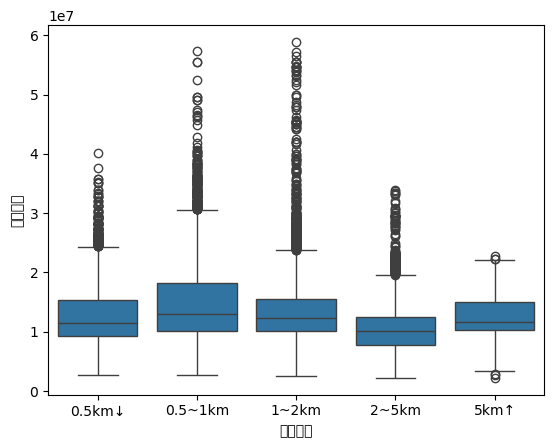

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

apart_df['거리구간'] = pd.cut(apart_df['스타벅스_거리_km'],
                         bins=[0, 0.5, 1, 2, 5, 100],
                         labels=["0.5km↓", "0.5~1km", "1~2km", "2~5km", "5km↑"])
sns.boxplot(data=apart_df, x='거리구간', y='평당가격')

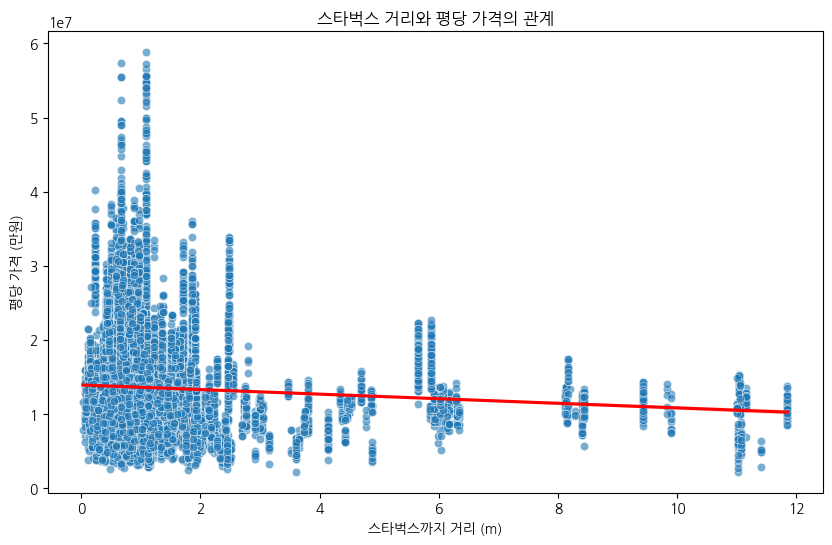

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# 한글 깨짐 방지(나눔고딕)
plt.rcParams['font.family'] = 'NanumGothic'

# 예시 DataFrame
# df['스타벅스거리'], df['평당가격'] 컬럼이 있다고 가정

plt.figure(figsize=(10, 6))
sns.scatterplot(data=apart_df, x='스타벅스_거리_km', y='평당가격', alpha=0.6)
sns.regplot(data=apart_df, x='스타벅스_거리_km', y='평당가격', scatter=False, color='red')  # 추세선
plt.title("스타벅스 거리와 평당 가격의 관계")
plt.xlabel("스타벅스까지 거리 (m)")
plt.ylabel("평당 가격 (만원)")
plt.show()
